In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
from matplotlib.ticker import LogLocator
import matplotlib

In [6]:
pos = pd.read_excel('Normdata3.xlsx')

In [7]:
#1:30 for particles
#1:29 for ions
diam=pos.iloc[0,1:28]
diam=np.asarray(diam)

print(diam)
#for time array
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta
        
#time array form 00:00 to 23:55 with 5 minutes step

dts = pd.date_range('00:00', '23:30', freq='30 min').strftime('%H:%M')
con=pd.read_excel('AAAAA.xlsx')
con=np.asarray(con)
v=[0,0.25,0.75,1]
v=np.asarray(v)
print(len(diam))
print(len(dts))

[0.8058421877614796 0.9305720409296969 1.074607828321312 1.240937760751713
 1.43301257023696 1.654817099943179 1.910952974970436 2.206734069084589
 2.548296747979348 2.942727176209281 3.398208328942561 3.924189758484536
 4.531583637600812 5.232991146814936 6.042963902381317 6.978305848598657
 8.058421877614812 9.305720409296983 10.74607828321314 12.40937760751713
 14.3301257023696 16.54817099943179 19.10952974970436 22.06734069084589
 25.48296747979348 29.42727176209277 33.98208328942556]
27
48


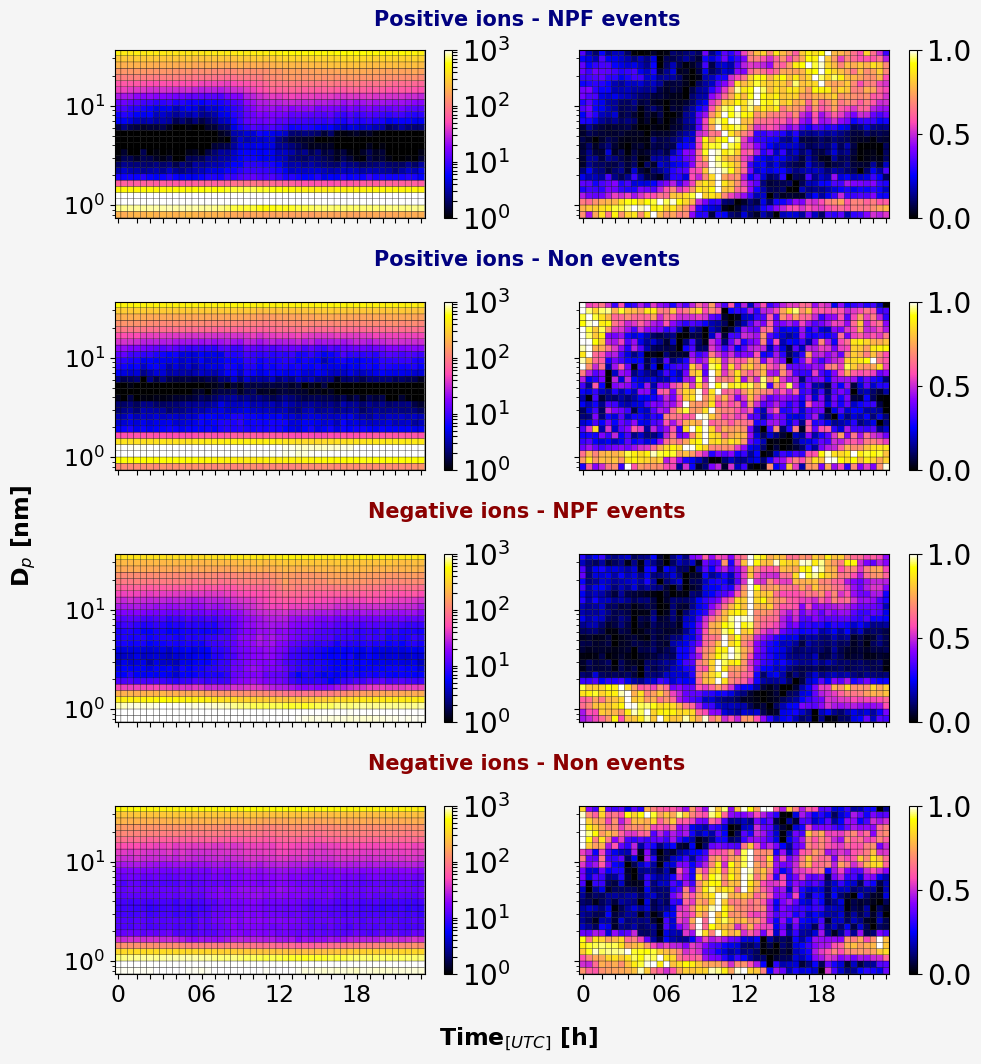

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
from matplotlib.ticker import LogLocator

# Your existing code
fig = plt.figure(figsize=(11, 12))
fig.patch.set_facecolor('whitesmoke')
plt.margins(x=0)
b = 0

for a in range(0, 8):
    b = b + 1
    plt.subplot(4, 2, b)
    if b == 1 or b == 3 or b == 5 or b == 7:
        con = pd.read_excel('AAAAA.xlsx', sheet_name=a)
        con = np.asarray(con)
        plt.margins(x=0)
        plt.yscale("log")
        plt.pcolor(dts, diam, con, norm=matplotlib.colors.LogNorm(vmin=1, vmax=1000), cmap=plt.cm.gnuplot2, edgecolors='k', linewidths=0.2)
        cbar = plt.colorbar(ticks=LogLocator(subs=range(10)), extendrect='True')
        tick_font_size = 20
        cbar.ax.tick_params(labelsize=tick_font_size)
        xticks = plt.gca().xaxis.get_major_ticks()
        yticks = plt.gca().yaxis.get_major_ticks()
        plt.gca().yaxis.label.set_fontsize(20)
        
        # Set y-ticks for the first, third, fifth, and seventh plots
        plt.tick_params(axis='y', which='both', labelsize=17)
    else:
        con = pd.read_excel('AAAAA.xlsx', sheet_name=a)
        con = np.asarray(con)
        plt.margins(x=0)
        plt.yscale("log")
        plt.pcolor(dts, diam, con, cmap=plt.cm.gnuplot2, vmin=0, vmax=1, edgecolors='k', linewidths=0.2)
        cbar = plt.colorbar(ticks=[0, 0.5, 1], extendrect='True')
        tick_font_size = 20
        cbar.ax.tick_params(labelsize=tick_font_size)
        xticks = plt.gca().xaxis.get_major_ticks()
        yticks = plt.gca().yaxis.get_major_ticks()
        plt.gca().yaxis.label.set_fontsize(20)
        
        # Hide y-tick labels for the second, fourth, sixth, and eighth plots
        plt.tick_params(axis='y', which='both', labelsize=17, labelcolor='none')
    
    if b == 7 or b == 8:
        plt.xticks(
            [0, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47],
            ['0', '', '', '', '', '', '06', '', '', '', '', '', '12', '', '', '', '', '', '18', '', '', '', '', ''],
            fontsize=20
        )
    else:
        plt.xticks(
            [0, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47],
            ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
            fontsize=20
        )
    
    plt.tick_params(axis='x', labelsize=17)

# Adjust layout to create larger gaps between rows
plt.subplots_adjust(hspace=0.5)

# Add titles for each row of subplots
fig.text(0.5, 0.90, 'Positive ions - NPF events', ha='center', fontdict={'fontname': 'Gill Sans MT', 'fontsize': 15}, color='navy', fontweight='bold')
fig.text(0.5, 0.70, 'Positive ions - Non events', ha='center', fontdict={'fontname': 'Gill Sans MT', 'fontsize': 15}, color='navy', fontweight='bold')
fig.text(0.5, 0.49, 'Negative ions - NPF events', ha='center', fontdict={'fontname': 'Gill Sans MT', 'fontsize': 15}, color='darkred', fontweight='bold')
fig.text(0.5, 0.28, 'Negative ions - Non events', ha='center', fontdict={'fontname': 'Gill Sans MT', 'fontsize': 15}, color='darkred', fontweight='bold')

# Set common y-axis label
fig.text(0.03, 0.44, r'D$_{p}$ [nm]', fontdict={'fontname': 'Gill Sans MT', 'fontsize': 17}, rotation=90, fontweight='bold')

# Set common x-axis label
fig.text(0.42, 0.05, r'Time$_{ [UTC] }$ [h]', fontdict={'fontname': 'Gill Sans MT', 'fontsize': 17}, fontweight='bold')

plt.savefig('QUIET(3)', bbox_inches='tight',dpi=1180)
plt.show()